In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns # we know about all the columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# finding about most popular category
df['Category'].value_counts(ascending=False)
# family is the category with most popular

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# printing stastical summary
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### To convert reviews column to integer

In [8]:
df.isnull().sum() # to find the null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [10]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [11]:
df[df['Reviews'].isnull()]  # no null vaues in reviews columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
# df[~df['Reviews'].str.isnumeric()]['Reviews'].str.split('M').str[0] # we will delete the 3.0 as no asar is there so much

In [13]:
df[~df['Reviews'].str.isnumeric()]
df.drop(index=10472,inplace=True)


In [14]:
df[~df['Reviews'].str.isnumeric()] # we delete the 3.0M review row


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
size_col=df['Size'].unique()
len(df['Size'].unique())

461

In [16]:
df['Size']=df['Size'].str.replace('k','000')
df['Size']=df['Size'].str.replace('M','00000')
df['Size']

0                   1900000
1                   1400000
2                  8.700000
3                   2500000
4                  2.800000
                ...        
10836               5300000
10837              3.600000
10838              9.500000
10839    Varies with device
10840               1900000
Name: Size, Length: 10840, dtype: object

In [17]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Last Updated_date']=df['Last Updated'].dt.date
df['Last Updated_month']=df['Last Updated'].dt.month
df["Last Updated_year"]=df['Last Updated'].dt.year


##
EDA

In [18]:
df[df['App'].duplicated()]
# df["App"].duplicated().sum()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_date,Last Updated_month,Last Updated_year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018-02-26,2,2018
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018-07-31,7,2018
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018-07-24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,3700000,"10,000,000+",Free,0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,2018-07-20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,2018-07-16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.400000,"100,000+",Free,0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,2016-02-25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.000000,"1,000,000+",Free,0,Everyone,Communication,2018-07-06,5.2,5.0 and up,2018-07-06,7,2018
10730,FP Notebook,MEDICAL,4.5,410,6000000,"50,000+",Free,0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,2018-03-24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,1200000,"1,000,000+",Free,0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,2018-07-30,7,2018


## This dataset "App" has duplicate values

In [19]:
# to drop app duplicates values
df.drop_duplicates(subset=['App'],inplace=True)
df['App'].duplicated().sum()
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Last Updated_date', 'Last Updated_month',
       'Last Updated_year'],
      dtype='object')

In [20]:
categorical_feat=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_feat=[numreical for numreical in df.columns if df[numreical].dtype!='O' ]
print(categorical_feat)
print(numerical_feat)

['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 'Last Updated_date']
['Rating', 'Last Updated', 'Last Updated_month', 'Last Updated_year']


In [21]:
df['App'].value_counts() # value_counts works like dictionary
for col in categorical_feat:
    print(df[col].value_counts())

# df['App'].value_counts()

App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
Pink Silver Bow Keyboard Theme                        1
Art Drawing Ideas                                     1
Anime Manga Coloring Book                             1
Easy Origami Ideas                                    1
I Creative Idea                                       1
Name: count, Length: 9659, dtype: int64
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS     

In [22]:
df['Category'].duplicated().sum()

np.int64(9626)

### Finding about most popular app category

In [23]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<Axes: ylabel='count'>

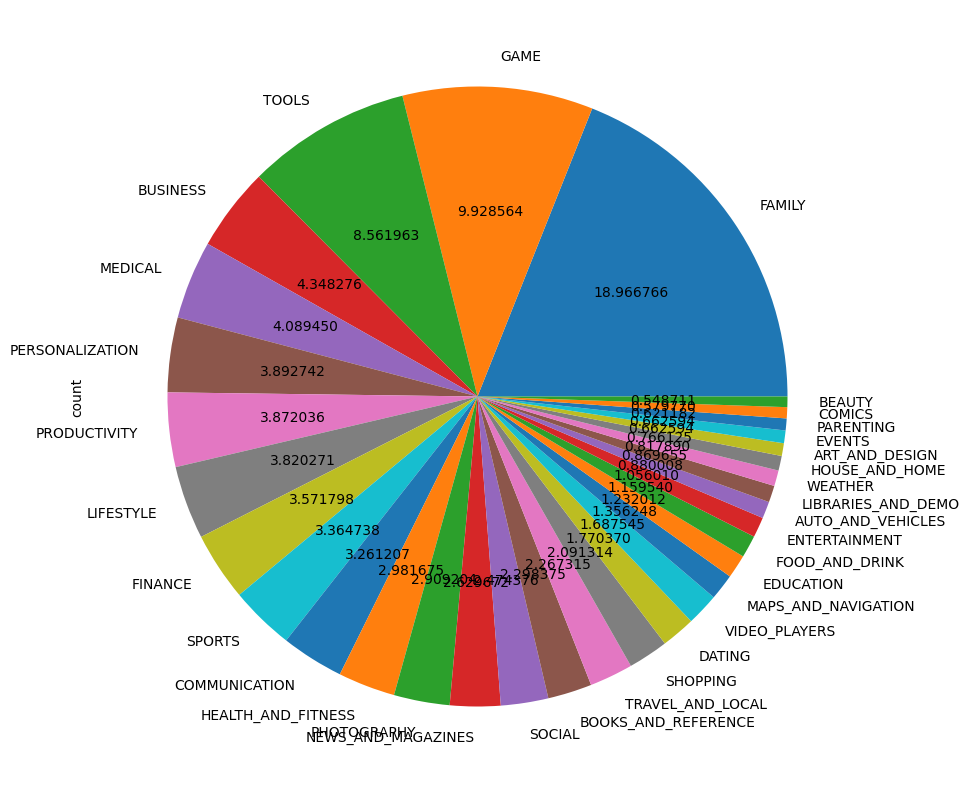

In [24]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(10,12),autopct='%1f')

In [25]:
#Which Category has largest number of installations??
df['Installs']=df['Installs'].str.removesuffix("+")
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].astype(int)
# df['Category'].unique()

In [26]:
df['Installs'].max()
print(len(df['Installs']))
print(len(df['Category']))
print(len(df['Installs'].unique()))
print(len(df['Category'].unique()))
# largest_installations=pd.DataFrame(df['Category'],df['Installs'])
# category=largest_installations.loc[df['Installs']==df['Installs'].max(),'Category']
# category

9659
9659
20
33


In [27]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
df_cat_installs
#Game is the most installled category



Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

In [28]:
#What are the Top 5 most installed Apps in Each popular Categories ??
dataset=pd.DataFrame(df_cat_installs).reset_index()
# df[df['Category']=='Game']
new_data=df.groupby(['Category','App'])['Installs'].sum().reset_index()
new_data=new_data.sort_values('Installs',ascending=False)


In [29]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [30]:
#How many apps are there on Google Play Store which get 5 ratings??
len(df[df['Rating']==5.0]['App'])

271

In [31]:
#Total of 271 apps which has 5 star rating
df.isnull().sum()

App                      0
Category                 0
Rating                1463
Reviews                  0
Size                     0
Installs                 0
Type                     1
Price                    0
Content Rating           0
Genres                   0
Last Updated             0
Current Ver              8
Android Ver              2
Last Updated_date        0
Last Updated_month       0
Last Updated_year        0
dtype: int64

In [ ]:
df[df['Android Ver'].isnull()]
mode=df['Android Ver'].mode()[0]
df[df['Android Ver']==mode]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated_date,Last Updated_month,Last Updated_year
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,2800000,1000000,Free,0,Everyone,Art & Design,2017-10-27,1.0.4,4.1 and up,2017-10-27,10,2017
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,2000000,10000000,Free,0,Teen,Art & Design,2018-04-02,3.8,4.1 and up,2018-04-02,4,2018
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.500000,500000,Free,0,Everyone,Art & Design,2018-07-31,3.1,4.1 and up,2018-07-31,7,2018
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,3100000,10000000,Free,0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up,2018-07-30,7,2018
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,1400000,100000,Free,0,Everyone,Art & Design,2018-04-20,4.0,4.1 and up,2018-04-20,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.600000,1000,Free,0,Teen,Education,2018-06-27,3.8.0,4.1 and up,2018-06-27,6,2018
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000,10000,Free,0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up,2016-06-19,6,2016
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,2017-06-18,6,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5300000,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017-07-25,7,2017


In [ ]:
df['Android Ver']=df['Android Ver'].fillna(mode)
df['Android Ver'].isnull().sum()
#THE MISSING DATA OF ANDROID VERSION IS BEING FILLED
df['G']

np.int64(0)

C:\Users\Mohit\AppData\Local\Temp\ipykernel_14772\621304496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Genres'].value_counts().index, y=df['Genres'].value_counts().values, palette="viridis")


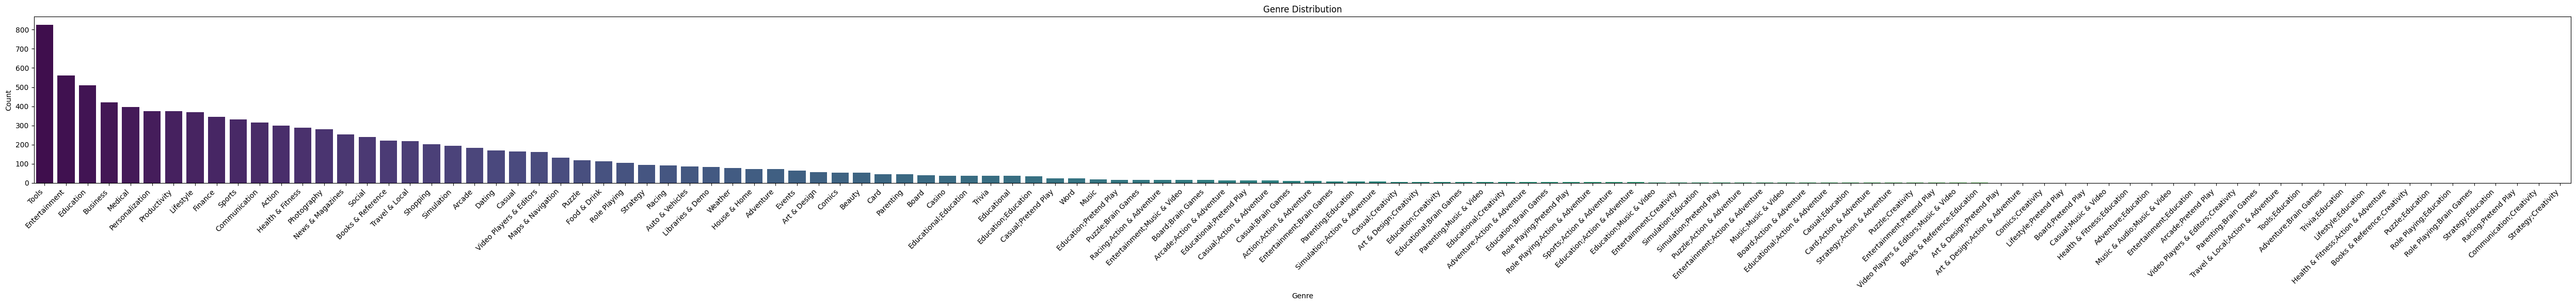

In [50]:
plt.figure(figsize=(50,6))  # Adjusted figure size for better readability
sns.barplot(x=df['Genres'].value_counts().index, y=df['Genres'].value_counts().values, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

np.int64(0)